# Synthetic Data Fit

In [4]:
from drdmannturb.calibration.calibration import CalibrationProblem
from drdmannturb.calibration.data_generator import OnePointSpectraDataGenerator
from drdmannturb.shared.parameters import (
    NNParameters,
    ProblemParameters,
    LossParameters,
    PhysicalParameters,
)

import torch
import torch.nn as nn
import numpy as np

L = 0.59

Gamma = 3.9
sigma = 3.4

domain = torch.logspace(-1, 2, 20)

# NOTE: Works for single GPU
dev = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"

In [7]:
pb = CalibrationProblem(
    "cpu",
    nn_params=NNParameters(
        activations=[nn.GELU(), nn.GELU(), nn.GELU()],
    ),
    prob_params=ProblemParameters(nepochs=5),
    loss_params=LossParameters(),
    phys_params=PhysicalParameters(L=0.59, Gamma=3.9, sigma=3.4, domain=domain),
)

In [8]:
parameters = pb.parameters
parameters[:3] = [np.log(L), np.log(Gamma), np.log(sigma)]

pb.parameters = parameters[: len(pb.parameters)]

k1_data_pts = domain
DataPoints = [(k1, 1) for k1 in k1_data_pts]

In [9]:
Data = OnePointSpectraDataGenerator(data_points=DataPoints).Data

In [10]:
pb.eval(k1_data_pts)
pb.calibrate(data=Data)


Calibrating MannNet...
torch.Size([80])
Initial loss:  0.11983820174125699

[Calibration.py -- calibrate]-> Epoch 0

loss  =  0.11983820174125699
loss  =  0.07176869409107496
loss  =  0.06534108917629278
loss  =  0.060145911709387545
loss  =  0.03814300515719723
loss  =  0.03813429406240454
loss  =  0.0380597425074194
loss  =  0.03769426394094805
loss  =  0.037690070813019914
loss  =  0.03767160075653524
loss  =  0.037515239090233535
loss  =  0.03747798975916535
loss  =  0.03733958665035549
loss  =  0.037256909201263747
loss  =  0.036934054146110076
loss  =  0.03671915332326785
loss  =  0.03632125215432111
loss  =  0.03530489475211928
loss  =  0.09322278282764204
loss  =  0.03443343166477727
loss  =  0.03400270262319784
loss  =  0.033767686851601565
loss  =  0.0333365618325264
loss  =  0.03266431810805892
loss  =  0.033172807470309075
loss  =  0.030508629043156488
---------------------------------



[Calibration.py -- calibrate]-> Epoch 1

loss  =  0.030508629043156488
loss  =  0.029

array([-0.53947768,  0.81225208,  0.87748096, -0.07228145, -0.27114144,
        0.09568755,  0.98101786, -0.6594117 ,  1.13930925,  0.33773903,
       -0.70698381,  0.1124987 ,  0.54591268, -0.16934605,  0.01383038,
       -0.42529126,  0.30981909, -0.37825329,  0.26237535, -0.55945315,
       -0.54174397,  0.14503189, -0.32628111, -0.56567291, -0.18372834,
       -0.47820896, -0.17320841, -0.49928773,  0.07872491, -0.14331971,
        0.86753642,  0.07856275, -0.04573179, -0.1112614 ,  0.04762418,
       -0.305703  ,  0.21402434, -0.30754442,  0.01607986, -0.27803066,
       -0.00732586,  0.08410714,  0.5578885 ,  0.35482791, -0.38634193,
        0.12163168,  0.43278951, -0.12737551, -0.15694773, -0.12477335,
       -0.01879228,  0.03630071, -0.3172094 ,  0.14446391,  0.62901714,
        0.0304735 ,  0.04188349, -0.31857167,  0.170746  , -0.00425854,
       -0.15551311,  0.24999897,  0.53174655, -0.30823856, -0.0527472 ,
       -0.52725367, -0.15253424, -0.1488767 , -0.03348557, -0.02

k1.size: torch.Size([20])   self.kF_data_vals: torch.Size([80])


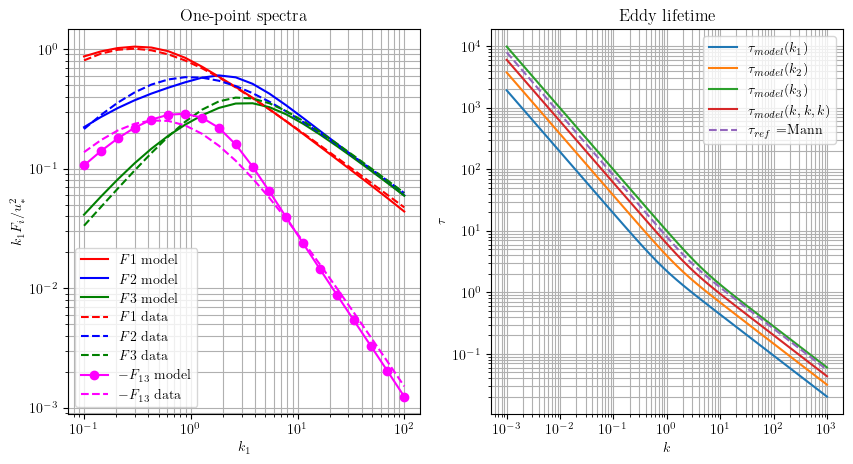

In [11]:
pb.plot(plt_dynamic=False)

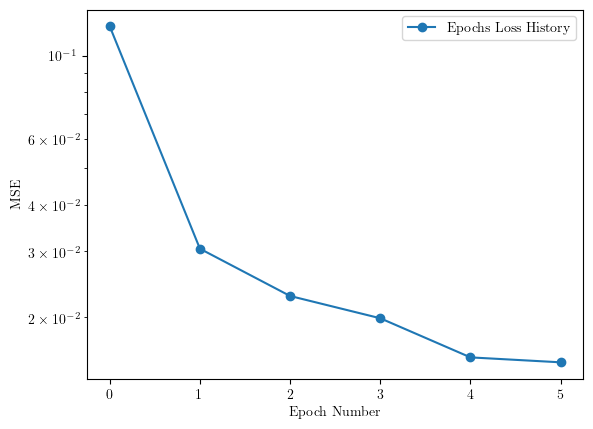

In [12]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(pb.loss_history_epochs, "o-", label="Epochs Loss History")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.yscale("log")

plt.show()